# COGS 108 - Factors Influencing Course Recommendations in UCSD STEM

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Video 
https://drive.google.com/file/d/1IvjRihylRAKDUF2URrKfGg8D0OsD-eTL/view?usp=sharing

# Abstract

This project explores the relationship between instructor quality, course workload, and class size using UCSD’s Course and Professor Evaluations (CAPE) dataset. We conducted exploratory data analysis (EDA) to investigate correlations between instructor recommendations, class recommendations, study hours, and class enrollment sizes. Through statistical methods such as Pearson correlation analysis, independent t-tests, Chi-Square test, and Ordinary Least Squares (OLS) regression, we found a strong positive correlation between instructor and class recommendation ratings, indicating that students' perceptions of instructors heavily influence their overall course evaluations. Additionally, study hours showed a weak negative correlation with course recommendations, suggesting that heavier workloads may slightly lower student satisfaction. Our t-test results revealed that smaller classes tend to have higher recommendation rates, and regression analysis confirmed a statistically significant but weak negative relationship between class size and course recommendation scores. These findings suggest that while class size and workload play a role in shaping student perceptions, instructor quality remains the primary driver of course recommendations. Our study provides insights for academic institutions to enhance teaching effectiveness and improve course structures based on student feedback.


# Names

- Jiaqi Wu
- Ella Wen
- Zihao Yang
- Yunqi Zhang
- Zhining Zhang

# Research Question

#### How do factors such as course workload, instructor quality, and course level (lower vs. upper division) correlate with student satisfaction scores in UCSD STEM courses, based on CAPE data from the 2020-2022 academic year?

The factors that may influence the likelihood of students recommending a class include:

- Instructor Quality: Indicated by the percentage of students recommending the instructor.

- Course Workload: Implied by the average number of hours spent studying per week.

- Grade Expectations vs. Actual Grades: Measured by the difference between expected and received GPA.

- Number of Evaluations: A higher number provides a more reliable recommendation rate.

- Enrollment Size: Larger class sizes may impact instruction quality and student engagement.

- Term and Course Context: Course content, teaching methods, and term-specific factors may influence recommendations.



## Background and Prior Work


When students at UCSD register for courses on WebReg each quarter, we often rely on Course and Professor Evaluations (CAPEs) to make our decisions. This online evaluation provides us insight on various aspects of a course, such as instructor, workload, and expected vs. received grades. One of the key categories within CAPE is the recommendation rate of the class, which is the percentage of students who would recommend a course to others. However, it remains unclear which factors have the most significant impact on a student’s likelihood of recommending a course.

For this project, we aim to analyze the correlation between CAPE recommendation rates and other CAPEs factors, such as instructor ratings, expected vs. received grades, study hours per week, and overall course enrollment. This can help us better select the courses.

In this past project shown in Reference #1, a group of UCSD students in COGS108 conducted research on past CAPE data, focusing on identifying the key factors that influence the average GPA of a class at UCSD. Their study explored correlations between expected and actual GPAs, study time, class/professor evaluations, and GPA trends across different fields and course levels. One of their notable findings was that upper-division classes tend to have higher average GPAs than lower-division classes, challenging common assumptions about course difficulty.

While their project primarily aimed to understand GPA predictors and their implications for university policies, our research takes a different approach by focusing on the factors that influence students' likelihood of recommending a class in CAPEs. Instead of analyzing the average GPA received by students, we examine the recommendation rate of a class to understand what aspects contribute to a positive course evaluation. However, like their study, our research also relies on CAPE survey data, making their findings a relevant reference for understanding broader academic trends at UCSD.

Prior studies in Reference #2 have explored various aspects of student course selection. Dahl et al. (2022) examined how student attitudes towards the class, class recommendation rate, and perceived behavioral control impact their decision to enroll in a course. This provides a similar approach to our question, what factors influenced the class recommendation rate. It aligns with our hypothesis that instructor quality, expected workload, and grading play a major role in student's satisfication. 



References (include links):
- 1) https://github.com/COGS108/FinalProjects-Sp23/blob/main/FinalProjectGroup_Sp23_DigitSapiens.ipynb
- 2) https://nactajournal.org/index.php/nactaj/article/view/138
- 3) https://github.com/UCSD-Historical-Enrollment-Data/UCSDHistEnrollData.git/ 

# Hypothesis



Instructor recommendation ratings, course workload, grade expectations, and enrollment size are significant predictors of class recommendation rates in UCSD STEM courses.
Specifically:

Courses with higher instructor recommendation ratings will have higher class recommendation rates.

Courses with lower workload will have higher class recommendation rates.

Courses where students’ actual grades meet or exceed their expectations will have higher class recommendation rates.

Smaller enrollment sizes will correlate with higher class recommendation rates compared to larger enrollment sizes.


# Data

## Dataset CAPE Student Course Evaluations

- **Dataset Name:** CAPE Student Course Evaluations
- **Link to the dataset:** *https://github.com/UCSD-Historical-Enrollment-Data/UCSDHistEnrollData/blob/master/data/CAPEs.tsv*
- **Number of observations:** **61,791**
- **Each observation is described by 11 variables, including:**
  - instructor (String) – The name of the instructor for the course.
  - sub_course (String) – The course code (e.g., CSE 101, MATH 20A).
  - course (String) – The name of the course (e.g., "Data Structures", "Calculus I").
  - term (String) – The academic term during which the course was offered (e.g., "Fall 2021").
  - enroll (Integer) – The total number of students enrolled in the class.
  - evals_made (Integer) – The number of students who submitted evaluations for the course.
  - rcmd_class (Float, 0.0 - 100.0) – The percentage of students who recommend the class.
  - rcmd_instr (Float, 0.0 - 100.0) – The percentage of students who recommend the instructor.
  - study_hr_wk (Float) – The average number of hours students reported studying for the course per week.
  - avg_grade_exp (Float, 0.0 - 4.0) – The average GPA that students expected to receive in the class.
  - avg_grade_rec (String) – The average letter grade that students reported expecting (e.g., "A", "B+").

The **CAPE dataset** contains student evaluations of university courses until **2023**, capturing key insights into instructor effectiveness, course difficulty, and student workload. Each row represents a specific course-section taught by an instructor in a given term (e.g., FA22 for Fall 2022) and includes metrics such as enrollment numbers, evaluation counts, and recommendation percentages for both the course and instructor. Additionally, it records students' reported study hours per week and their expected vs. received GPA. Missing values in the **`avg_grade_rec`** column, originally represented as `-1`, have been removed to ensure data accuracy. With proper analysis, this dataset can be used to study student's staisfactory scores towards different courses over time.

###   Set up

In [ ]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

import patsy
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Load our data
file_path = "data/CAPEs.tsv"
df = pd.read_csv(file_path, sep="\t")

Note: you may need to restart the kernel to use updated packages.


### Data Cleaning

We filtered the dataset to focus on the 2020-2022 academic years and cleaned the data by removing rows with invalid recommendation grades and any missing values.

In [3]:
# Our research question only focus between 2020 - 2022 academic years
time_frame = ['20', '21', '22']
df = df[df['term'].str[-2:].isin(time_frame)]

# Data Cleaning
df_cleaned = df[df['avg_grade_rec'] != -1]
df_cleaned = df_cleaned.dropna()

# Display the cleaned dataframe
df_cleaned

,instructor,sub_course,course,term,enroll,evals_made,rcmd_class,rcmd_instr,study_hr_wk,avg_grade_exp,avg_grade_rec
33,"Fortier, Jana",ANAR 100,Spec Topics/Anth Archaeology,FA22,20,3,100.0,100.0,3.17,3.33,3.30
36,"Goldstein, Paul S",ANAR 143,Biblical Arch,FA22,25,8,100.0,100.0,1.36,3.86,3.85
37,"Marchetto, Maria Carolina",ANBI 100,Special Topic/Biological Anth,FA22,30,14,100.0,100.0,1.93,4.00,3.99
41,"Gagneux, Pascal",ANBI 141,The Evolution of Human Diet,FA22,186,69,98.5,100.0,3.76,3.70,3.66
42,"Hrvoj Mihic, Branka",ANBI 145,Bioarchaeology,FA22,20,4,75.0,100.0,4.50,3.33,2.84
...,...,...,...,...,...,...,...,...,...,...,...
61786,"Gladstein, Jill M",SYN 1,Perspectives/Changing Planet,WI22,404,243,90.9,93.4,3.95,3.94,3.90
61787,"Gladstein, Jill M",SYN 2,Explorations/Changing Planet,WI22,191,93,77.0,88.5,4.18,3.79,3.89
61788,"Gladstein, Jill M",SYN 2,Explorations/Changing Planet,FA21,319,135,68.0,74.4,3.89,3.93,3.88
61789,"Gladstein, Jill M",SYN 1,Perspectives/Changing Planet,SP21,235,107,90.6,95.3,5.15,3.85,3.88


We defined a list of STEM course prefixes and filtered the dataset to include only courses from the STEM field based on the department.

In [4]:
# We defined a list of STEM courses prefix 
STEM = ['MATH', 'CHEM', 'BI', 'COGS', 'CSE', 'ECON', 'ECE', 'MAE', 'PHYS', 'DSC', 'BENG', 'NANO', 'CENG', 'SE']

# Filter for courses only in STEM field
df_cleaned['department'] = df_cleaned['sub_course'].astype(str).str.split().str[0]
cleaned_df_stem = df_cleaned[df_cleaned['department'].isin(STEM) | df_cleaned['department'].str.startswith('BI')]

We applied Min-Max normalization to the evals_made column and removed courses with too few evaluations (below the bottom 5% threshold).

In [5]:
# Use Min-Max Normalization to normalize the evals_made counts
cleaned_df_stem['evals_made'] = (cleaned_df_stem['evals_made'] - cleaned_df_stem['evals_made'].min()) / \
                                 (cleaned_df_stem['evals_made'].max() - cleaned_df_stem['evals_made'].min())

# Drop courses with too few evaluations made (Bottom 5% threshold)
threshold = cleaned_df_stem['evals_made'].quantile(0.05)
cleaned_df_stem = cleaned_df_stem[cleaned_df_stem['evals_made'] >= threshold]

# Display the final dataframe
cleaned_df_stem.reset_index(drop=True, inplace=True)
cleaned_df_stem

/var/folders/lr/4xzg37bn3rxgc2zqxp9j_g640000gn/T/ipykernel_9619/675035760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_stem['evals_made'] = (cleaned_df_stem['evals_made'] - cleaned_df_stem['evals_made'].min()) / \


,instructor,sub_course,course,term,enroll,evals_made,rcmd_class,rcmd_instr,study_hr_wk,avg_grade_exp,avg_grade_rec,department
0,"Mc Culloch, Andrew Douglas",BENG 110,Muskoloskeletal Biomechanics,FA22,97,0.150427,81.3,84.6,6.48,3.19,3.16,BENG
1,"Cauwenberghs, Gert",BENG 122A,Biosystems and Control,FA22,60,0.030769,80.0,80.0,8.60,3.50,3.53,BENG
2,"Smarr, Benjamin",BENG 134,Measurements/Stats/Probability,FA22,26,0.025641,94.4,88.9,6.50,3.35,2.87,BENG
3,"Lal, Ratnesh",BENG 141,Biomedical Optics and Imaging,FA22,49,0.056410,94.1,82.4,4.56,3.83,3.85,BENG
4,"Fraley, Stephanie I.",BENG 161A,Bioreactor Engineering,FA22,61,0.076923,75.0,75.0,9.48,3.23,3.04,BENG
...,...,...,...,...,...,...,...,...,...,...,...,...
4607,"Langlois, Marina",DSC 30,DataStrc/Algrthms for Data Sci,WI20,98,0.046154,85.2,88.5,11.69,3.00,2.67,DSC
4608,"Eldridge, Justin Matthew",DSC 40A,Theor Fndtns of Data Sci I,WI20,99,0.063248,89.5,100.0,5.58,3.29,3.53,DSC
4609,"Tiefenbruck, Janine LoBue",DSC 40B,Theor Fndtns of Data Sci II,WI20,57,0.025641,100.0,100.0,6.06,3.61,2.94,DSC
4610,"Tiefenbruck, Janine LoBue",DSC 40B,Theor Fndtns of Data Sci II,WI20,37,0.015385,80.0,90.0,5.10,3.25,3.01,DSC


# Exploratory Data Analysis and Results

### Section 1 of EDA - Relationship Between Instructor Recommendation Ratings and Class Recommendation Rates.

First, we'll take a brief look at the dataset to understand its structure and contents. We'll begin by loading the cleaned dataset and displaying its basic information, including the number of entries, column names, and data types.

In [6]:
# Load the dataset
df = cleaned_df_stem

# Display basic info and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instructor     4612 non-null   object 
 1   sub_course     4612 non-null   object 
 2   course         4612 non-null   object 
 3   term           4612 non-null   object 
 4   enroll         4612 non-null   int64  
 5   evals_made     4612 non-null   float64
 6   rcmd_class     4612 non-null   float64
 7   rcmd_instr     4612 non-null   float64
 8   study_hr_wk    4612 non-null   float64
 9   avg_grade_exp  4612 non-null   float64
 10  avg_grade_rec  4612 non-null   float64
 11  department     4612 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 432.5+ KB
None
            enroll   evals_made   rcmd_class   rcmd_instr  study_hr_wk  \
count  4612.000000  4612.000000  4612.000000  4612.000000  4612.000000   
mean    127.128361     0.109308    85.860581    86.646899   

Next, we'll check for missing values in the dataset to identify any gaps that might need to be handled before further analysis. Then, we'll explore the relationship between instructor recommendations and class recommendations using a scatter plot. This visual representation will help us identify any patterns or trends between these two variables. Finally, we'll compute the Pearson correlation coefficient to quantify the strength and direction of the relationship between instructor and class recommendations.

instructor       0
sub_course       0
course           0
term             0
enroll           0
evals_made       0
rcmd_class       0
rcmd_instr       0
study_hr_wk      0
avg_grade_exp    0
avg_grade_rec    0
department       0
dtype: int64


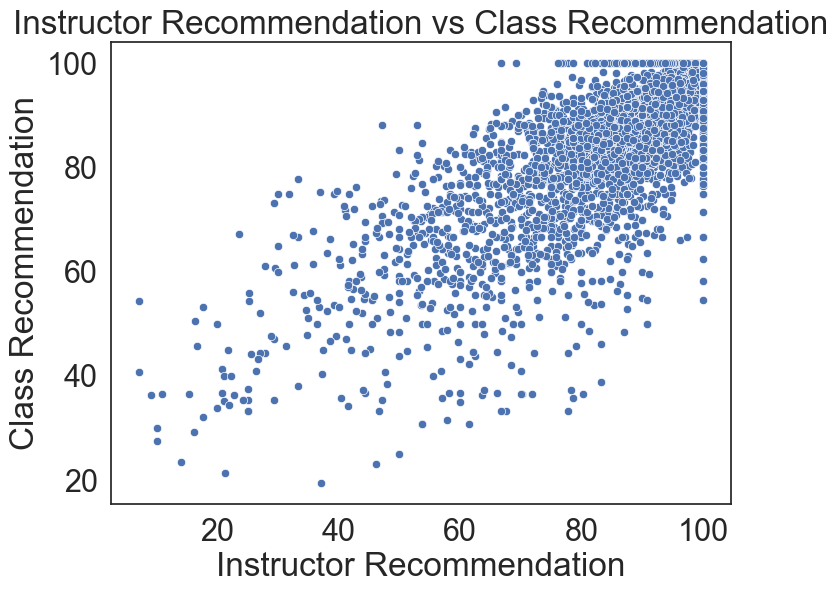

Correlation Matrix:
             rcmd_instr  rcmd_class
rcmd_instr    1.000000    0.790572
rcmd_class    0.790572    1.000000


In [7]:
# Check for missing values
print(df.isnull().sum())

# Scatter plot to check correlation between instructor and class recommendation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["rcmd_instr"], y=df["rcmd_class"])
plt.xlabel("Instructor Recommendation")
plt.ylabel("Class Recommendation")
plt.title("Instructor Recommendation vs Class Recommendation")
plt.show()

# Compute Pearson correlation
correlation = df[["rcmd_instr", "rcmd_class"]].corr()
print("Correlation Matrix:\n", correlation)

Interpretation of the Correlation Coefficient (0.79):
- Strength: A correlation of 0.79 indicates a strong positive relationship between instructor recommendation and class recommendation. This means that courses where students rate the instructor highly tend to also have high class recommendation ratings.

- Direction: Since the correlation is positive, as the instructor recommendation rating increases, the class recommendation rating also tends to increase.

- Implication: The strong correlation suggests that instructor quality plays a significant role in how much students enjoy or recommend a course. However, correlation does not imply causation—other factors (such as course content, difficulty, or grading policy) could also influence class recommendations.

To further understand the data, we'll examine the distribution of instructor and class recommendations. Using histograms, we'll visualize how these recommendations are spread across different values. The kernel density estimate (KDE) will help highlight the underlying distribution patterns. This step allows us to identify potential skewness, outliers, or clustering in the data, which could impact our analysis and interpretations.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


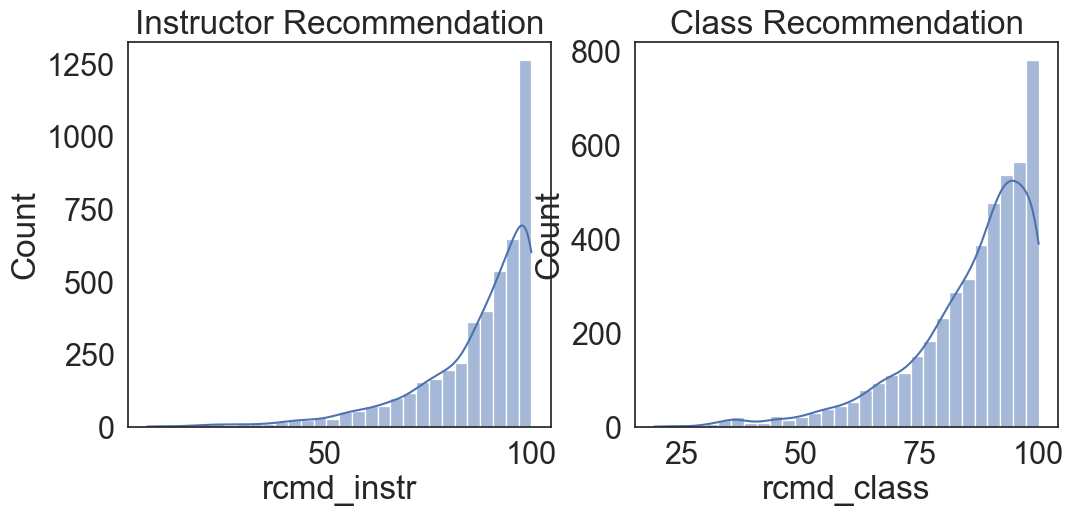

In [8]:
# Distribution of instructor and class recommendations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["rcmd_instr"], bins=30, kde=True, ax=ax[0])
ax[0].set_title("Instructor Recommendation")

sns.histplot(df["rcmd_class"], bins=30, kde=True, ax=ax[1])
ax[1].set_title("Class Recommendation")

plt.show()

Considering that our dataset integrates data from multiple departments, we want to understand more subdividedly whether there is still a correlation within each department that is similar to the overall correlation.

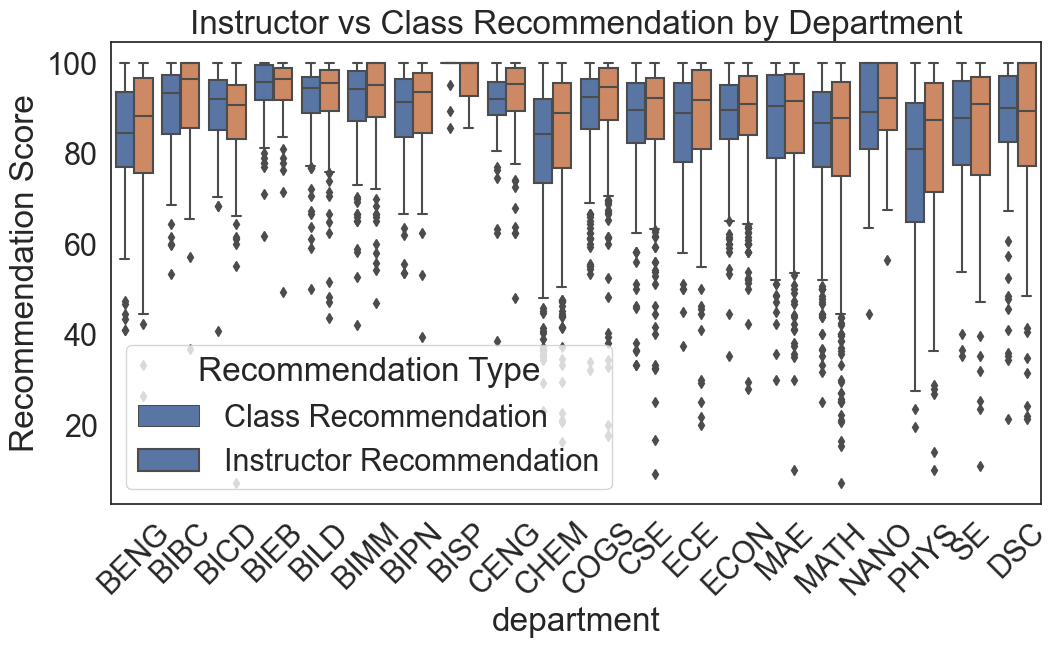

In [9]:
# Convert data to long format for easier plotting
df_melted = df.melt(id_vars=["department"], value_vars=["rcmd_class", "rcmd_instr"], 
                     var_name="Recommendation Type", value_name="Recommendation Score")

# Create a single boxplot with hue
plt.figure(figsize=(12, 6))
sns.boxplot(x="department", y="Recommendation Score", hue="Recommendation Type", data=df_melted)

# Rotate department labels for readability
plt.xticks(rotation=45)
plt.title("Instructor vs Class Recommendation by Department")

# Show plot
plt.legend(title="Recommendation Type", labels=["Class Recommendation", "Instructor Recommendation"])
plt.show()

We'll analyze the relationship between instructor recommendations and class recommendations across different departments using Spearman's rank correlation. Unlike Pearson correlation, Spearman correlation measures the strength and direction of the monotonic relationship between two variables, making it more suitable for ordinal data or non-linear relationships. We group the data by department and compute Spearman's correlation coefficient along with the p-value for statistical significance. Finally, we organize the results into a DataFrame for better visualization and interpretation.

In [10]:
# Group by department and calculate Spearman correlation
spearman_results = {}

for department in df["department"].unique():
    sub_df = df[df["department"] == department]
    spearman_corr, p_value = stats.spearmanr(sub_df["rcmd_instr"], sub_df["rcmd_class"])
    spearman_results[department] = {"Spearman Correlation": spearman_corr, "p-value": p_value}

# Convert results into a DataFrame for better visualization
spearman_df = pd.DataFrame.from_dict(spearman_results, orient="index").reset_index()
spearman_df.rename(columns={"index": "Department"}, inplace=True)

# Display results
print(spearman_df)

   Department  Spearman Correlation        p-value
0        BENG              0.750487   4.682408e-22
1        BIBC              0.782973   2.749562e-16
2        BICD              0.744402   2.637040e-20
3        BIEB              0.586382   1.060574e-06
4        BILD              0.708665   1.302087e-37
5        BIMM              0.837526   2.415162e-53
6        BIPN              0.772172   1.358706e-24
7        BISP              0.676485   1.470692e-03
8        CENG              0.625625   1.982079e-10
9        CHEM              0.788356   2.168592e-93
10       COGS              0.711403   8.561517e-53
11        CSE              0.719091   1.222240e-79
12        ECE              0.788333   1.168306e-54
13       ECON              0.708829   3.073206e-61
14        MAE              0.803916   6.195576e-72
15       MATH              0.761707  8.289649e-152
16       NANO              0.695950   2.446065e-06
17       PHYS              0.811528   8.669156e-75
18         SE              0.72

- Most departments show a strong positive correlation (above 0.6), meaning that higher instructor recommendations generally align with higher class recommendations.
- The highest correlation is found in BIMM (0.841), suggesting that in this department, students’ perception of the instructor almost directly translates to their perception of the class.
- The lowest correlation is in BIEB (0.575), which still suggests a moderate positive relationship but indicates that factors other than instructor rating might play a bigger role in class recommendation in this department.
- All p-values are extremely small (p < 0.05), indicating that the observed correlations are statistically significant.
The small p-values confirm that the correlation is not due to random chance, meaning that there is strong evidence to support the hypothesis that instructor ratings influence class recommendations.
- The small p-values confirm that the correlation is not due to random chance, meaning that there is strong evidence to support the hypothesis that instructor ratings influence class recommendations.

#### Across most departments, instructor recommendations (orange) tend to be slightly higher or close to class recommendations (blue).

#### Some departments show a clear gap between instructor and class recommendations:
- For instance, CSE (Computer Science & Engineering) and MAE (Mechanical & Aerospace Engineering) show more variability, meaning there are courses where students recommend instructors highly but may not feel as strongly about the course itself.
In contrast, departments like BENG (Bioengineering) and PHYS (Physics) seem to have closely aligned ratings for both instructor and class recommendations, indicating consistent perceptions of instructors and courses.

### Section 2 of EDA  - Relationship Between Study Hours and Course Recommendation Rates

To investigate whether courses with lower workloads receive higher recommendation rates, we conduct an exploratory data analysis using both visualization and statistical modeling.

#### Visualizing the Relationship
We begin with a scatterplot and fitted regression line to observe the trend between weekly study hours and recommendation rates:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


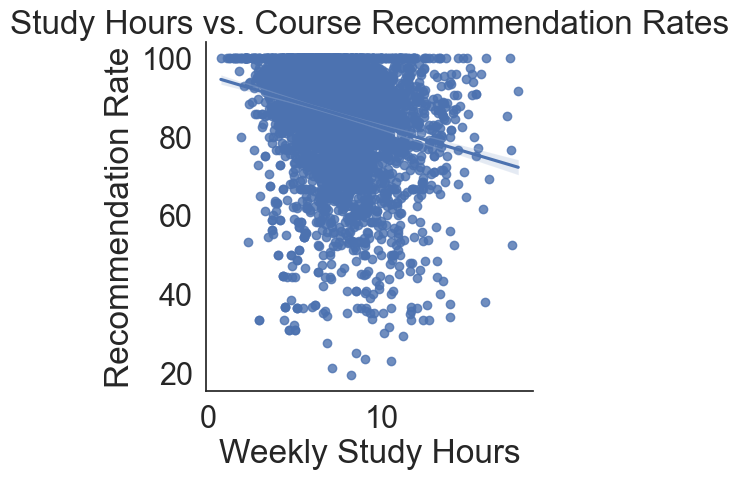

In [11]:
# Scatterplot with regression line
studyhour_vs_rcmdrates = sns.lmplot(
    data=cleaned_df_stem,
    x='study_hr_wk',
    y='rcmd_class'
)

plt.xlabel("Weekly Study Hours")
plt.ylabel("Recommendation Rate")
plt.title("Study Hours vs. Course Recommendation Rates")
plt.show()

The regression line suggests a negative correlation—courses requiring more study hours tend to have lower recommendation rates.

#### Statistical Analysis (OLS Regression)
To quantify the relationship, we fit an Ordinary Least Squares (OLS) regression model:

In [12]:
# Define the regression model
outcome, predictors = patsy.dmatrices('rcmd_class ~ study_hr_wk', data=cleaned_df_stem)
model = sm.OLS(outcome, predictors)
results = model.fit()

# Display the result 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             rcmd_class   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     246.4
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           3.95e-54
Time:                        12:26:56   Log-Likelihood:                -18361.
No. Observations:                4612   AIC:                         3.673e+04
Df Residuals:                    4610   BIC:                         3.674e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      95.4713      0.641    148.855      

The OLS analysis provides evidence supporting **Hypothesis #2**, which states that courses with lower workload (fewer study hours per week) will have higher class recommendation rates.

- The regression results indicate a **weak but statistically significant negative correlation** (R^2 = 0.051), suggesting that **weekly study hours explain only 5.1% of the variation** in recommendation rates.
- The **regression coefficient** reveals that **for each additional study hour per week, the recommendation rate decreases by approximately 1.3%**.
- **Study hours alone are not a strong predictor**


#### Comparing High vs. Low Workload Courses
To gain deeper insights, we categorize courses into three workload groups based on weekly study hours and compare their mean recommendation rates:

workload_category
Low (0-5 hrs)        89.583013
Medium (6-10 hrs)    86.056466
High (11+ hrs)       80.610877
Name: rcmd_class, dtype: float64


/var/folders/lr/4xzg37bn3rxgc2zqxp9j_g640000gn/T/ipykernel_9619/383533059.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rcmd_rates = cleaned_df_stem.groupby('workload_category')['rcmd_class'].mean()


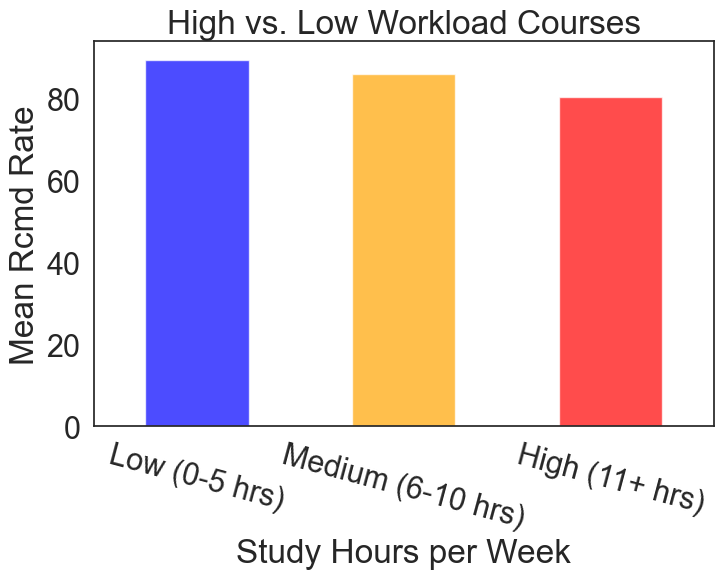

In [13]:
# Define bins and labels
bins = [0, 5, 10, float("inf")]
labels = ['Low (0-5 hrs)', 'Medium (6-10 hrs)', 'High (11+ hrs)']

# Categorize study hours
cleaned_df_stem['workload_category'] = pd.cut(cleaned_df_stem['study_hr_wk'], bins=bins, labels=labels, right=True)

# Compute mean recommendation rates per category
mean_rcmd_rates = cleaned_df_stem.groupby('workload_category')['rcmd_class'].mean()

# Display results
print(mean_rcmd_rates)

# Plot the results
plt.figure(figsize=(8, 5))
mean_rcmd_rates.plot(kind='bar', color=['blue', 'orange', 'red'], alpha=0.7)
plt.xlabel("Study Hours per Week")
plt.ylabel("Mean Rcmd Rate")
plt.title("High vs. Low Workload Courses")
plt.xticks(rotation=-15)
plt.show()

### Chi-Square Test for Workload Category vs. Recommendation

Convert rcmd_class to binary (recommended if above median) and test independence between workload categories and recommendation rate.

In [ ]:
# Calculate the median recommendation rate
median_rcmd = cleaned_df_stem['rcmd_class'].median()
print("Median Recommendation Rate:", median_rcmd)

# Create a binary recommendation column based on the median
cleaned_df_stem['rcmd_binary'] = (cleaned_df_stem['rcmd_class'] >= median_rcmd).astype(int)

# Create contingency table
contingency_table = pd.crosstab(cleaned_df_stem['workload_category'], cleaned_df_stem['rcmd_binary'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

Median Recommendation Rate: 89.5
Chi-Square Statistic: 140.54845347108304
p-value: 3.0219766805953517e-31


The extremely low p-value (**p < 0.001**) indicates a **highly significant association** between workload category and recommendation outcome. This suggests that **workload levels do impact how likely students are to recommend a course** when using the median as a benchmark.

Specifically, courses with **lower workload categories** are more likely to fall into the **highly recommended group**, reinforcing the observed trend that **heavier workloads may reduce student satisfaction**.

### Section 3 of EDA - courses where students’ actual grades meet or exceed their expectations have higher class recommendation rates.

First, we create an indicator column. If its value is greater than a certain threshold, it means the expectation is lower (denoted as 0); otherwise, it is denoted as 1.
Then, perform grouping and aggregation: Calculate the rcmd_class for both 0 and 1.

In [15]:
# Create an Indicator Column
cleaned_df_stem['grade_with_high_expectation'] = np.where(
    cleaned_df_stem['avg_grade_rec'] >= cleaned_df_stem['avg_grade_exp'], 0, 1
)

group_means = cleaned_df_stem.groupby('grade_with_high_expectation')['rcmd_class'].mean()
print(group_means)


grade_with_high_expectation
0    83.391493
1    87.155934
Name: rcmd_class, dtype: float64


Students who did not meet their expected grades gave an average recommendation rate of 87.16, while students who met or exceeded their expectations had a lower average recommendation rate of 83.39.

T-statistic: Measures the difference between the two group means relative to the variation in the data. A higher absolute value indicates a greater difference between the groups.

P-value: Indicates whether the difference in means is likely due to chance. It is commonly compared to a significance level (e.g., 0.05) to determine statistical significance. If the p-value is below this threshold, the difference is considered statistically significant.


In [16]:
group0 = cleaned_df_stem[cleaned_df_stem['grade_with_high_expectation'] == 0]['rcmd_class'].dropna()
group1 = cleaned_df_stem[cleaned_df_stem['grade_with_high_expectation'] == 1]['rcmd_class'].dropna()

t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
print("T-statistic:", t_stat)
print("p-value:", p_value)


T-statistic: -8.529559450116736
p-value: 2.446963348454862e-17


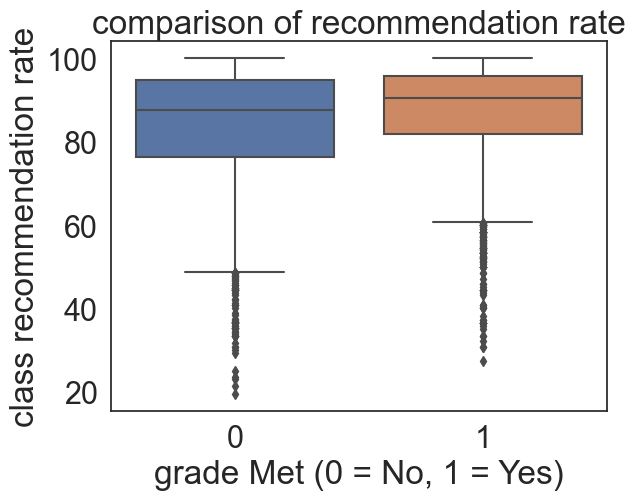

In [17]:
sns.boxplot(
    x='grade_with_high_expectation', 
    y='rcmd_class', 
    data=cleaned_df_stem
)
plt.xlabel('grade Met (0 = No, 1 = Yes)')
plt.ylabel('class recommendation rate')
plt.title('comparison of recommendation rate')
plt.show()


finding: 
- Both groups have fairly high recommendation rates overall — most values are clustered around 80 to 100.
- The median recommendation rate (horizontal line within each box) for group 1 (met/exceeded) appears slightly higher than that for group 0 (did not meet), but the difference doesn’t look dramatic.
- The boxes (25th–75th percentile) overlap quite a bit, suggesting that while students who met/exceeded expectations might be slightly more inclined to recommend the class, there is still considerable variation.



Based on the boxplot (and presumably the underlying data), the results support (agree with) the hypothesis that courses in which students’ actual grades meet or exceed their expectations tend to have higher class recommendation rates.

You can see this in:

- The median recommendation rate for students whose grades met/exceeded expectations is higher than for those who did not meet their expectations.
- Although there is overlap in the distributions, the general trend indicates students are more satisfied and thus more likely to recommend the class when their grade meets or surpasses what they expected.


### Section 4 of EDA - How does smaller enrollment sizes correlate with higher class recommendation rates compared to larger enrollment sizes.

To test the hypothesis that smaller enrollment sizes correlate with higher class recommendation rates compared to larger enrollment sizes, we categorized classes into "Small" and "Large" groups using quantile-based binning (qcut) with two bins. This approach divides the dataset into two equal-sized groups based on the distribution of enrollment numbers, ensuring a balanced comparison between smaller and larger classes. Additionally, we identified the range of enrollment sizes for the "Small" category to provide a clear understanding of class size distribution.

In [18]:
# Define enrollment size categories using quartile-based binning
cleaned_df_stem["size_category"] = pd.qcut(cleaned_df_stem["enroll"], q=2, labels=["Small", "Large"])

This code identifies the minimum enrollment size, retrieves its corresponding row, and determines the enrollment range for small classes after categorizing them using quantile-based binning.

In [19]:
# Find the minimum enrollment sizes
min_enroll = cleaned_df_stem["enroll"].min()

# Retrieve the rows corresponding to the minimum enrollment sizes
min_enroll_row = cleaned_df_stem[cleaned_df_stem["enroll"] == min_enroll]

# Print the results
print(f"Minimum Enrollment Size: {min_enroll}")
print("Row with Minimum Enrollment Size:")
print(min_enroll_row)

# Determine the range for small class sizes
small_class_range = (cleaned_df_stem[cleaned_df_stem["size_category"] == "Small"]["enroll"].min(),
                     cleaned_df_stem[cleaned_df_stem["size_category"] == "Small"]["enroll"].max())

# Print the defined ranges
print(f"\nSmall Class Size Range: {small_class_range}")

Minimum Enrollment Size: 20
Row with Minimum Enrollment Size:
                      instructor sub_course                          course  \
61               Engler, Adam J.   BENG 193  Clinical Exp in Bioengineering   
179             Golden, Susan S.   BIMM 194                      Adv Topics   
717         Gambel, Jessica Erin     BILD 3    Organismic&Evolutionary Biol   
813                    Chao, Lin   BIEB 143      Comp Modeling in Evol/Ecol   
814                Rifkin, Scott   BIEB 143      Comp Modeling in Evol/Ecol   
912          Akbari, Omar Sultan   BIMM 194                      Adv Topics   
1599      Voytek, Bradley Thomas   COGS 138             Neural Data Science   
1708     Leonardis, Eric Jeffrey     COGS 8                           Hands   
2046  Soosai Raj, Adalbert Geral    CSE 190  Topics/Computer Sci & Engineer   
2221               Shang, Jingbo    CSE 191   Semnr/Computer Sci & Engineer   
2262              Saad, Andrew S     ECE 65       Components & Circui

This code identifies the maximum enrollment size, retrieves the corresponding row, and determines the range for large class sizes based on the "Large" category from the quantile-based binning.

In [20]:
# Find the maximum enrollment sizes
max_enroll = cleaned_df_stem["enroll"].max()

# Retrieve the rows corresponding to the maximum enrollment sizes
max_enroll_row = cleaned_df_stem[cleaned_df_stem["enroll"] == max_enroll]

# Print the results
print(f"\nMaximum Enrollment Size: {max_enroll}")
print("Row with Maximum Enrollment Size:")
print(max_enroll_row)

# Determine the range for large class sizes
large_class_range = (cleaned_df_stem[cleaned_df_stem["size_category"] == "Large"]["enroll"].min(),
                     cleaned_df_stem[cleaned_df_stem["size_category"] == "Large"]["enroll"].max())

# Print the defined ranges
print(f"Large Class Size Range: {large_class_range}")


Maximum Enrollment Size: 1101
Row with Maximum Enrollment Size:
                instructor sub_course                course  term  enroll  \
4072  Arlett, Jessica Lynn   PHYS 1AL  Mechanics Laboratory  FA22    1101   
4073      Tsai, Philbert S   PHYS 1AL  Mechanics Laboratory  FA22    1101   
4074            Yagil, Avi   PHYS 1AL  Mechanics Laboratory  FA22    1101   

      evals_made  rcmd_class  rcmd_instr  study_hr_wk  avg_grade_exp  \
4072    0.695726        44.5        66.1         4.32            3.1   
4073    0.695726        44.5        62.2         4.32            3.1   
4074    0.695726        44.5        62.1         4.32            3.1   

      avg_grade_rec department workload_category  rcmd_binary  \
4072           3.23       PHYS     Low (0-5 hrs)            0   
4073           3.23       PHYS     Low (0-5 hrs)            0   
4074           3.23       PHYS     Low (0-5 hrs)            0   

      grade_with_high_expectation size_category  
4072                      

Based on the data, the "Small" class sizes range from 20 to 94 students, while the "Large" class sizes range from 95 to 1101 students.

This code calculates the correlation between enrollment size and class recommendation rate, interpreting whether smaller or larger classes tend to have higher recommendation rates.

In [21]:
# Compute correlation between enrollment size and recommendation rate
correlation = cleaned_df_stem["enroll"].corr(cleaned_df_stem["rcmd_class"])
print(f"Correlation between enrollment size and class recommendation rate: {correlation:.4f}")

# Interpretation
if correlation < 0:
    print("Negative correlation found: Smaller classes tend to have higher recommendation rates.")
elif correlation > 0:
    print("Positive correlation found: Larger classes tend to have higher recommendation rates.")
else:
    print("No significant correlation found.")

Correlation between enrollment size and class recommendation rate: -0.0739
Negative correlation found: Smaller classes tend to have higher recommendation rates.


The analysis found a weak negative correlation (-0.0739) between enrollment size and class recommendation rate, indicating that smaller classes tend to receive higher recommendation rates.

This code computes the average recommendation rates for "Small" and "Large" class categories and compares them to interpret which group has a higher recommendation rate.

In [22]:
# Compute average recommendation rates for each category
avg_rcmd = cleaned_df_stem.groupby("size_category")["rcmd_class"].mean()
print(avg_rcmd)

# Interpretation
if avg_rcmd["Small"] > avg_rcmd["Large"]:
    print("Small classes have a higher recommendation rate, supporting the hypothesis.")
else:
    print("Large classes have a higher or similar recommendation rate.")

size_category
Small    86.547873
Large    85.160656
Name: rcmd_class, dtype: float64
Small classes have a higher recommendation rate, supporting the hypothesis.


/var/folders/lr/4xzg37bn3rxgc2zqxp9j_g640000gn/T/ipykernel_9619/3402516528.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rcmd = cleaned_df_stem.groupby("size_category")["rcmd_class"].mean()


The analysis shows that small classes have a slightly higher recommendation rate than large classes, supporting the hypothesis.

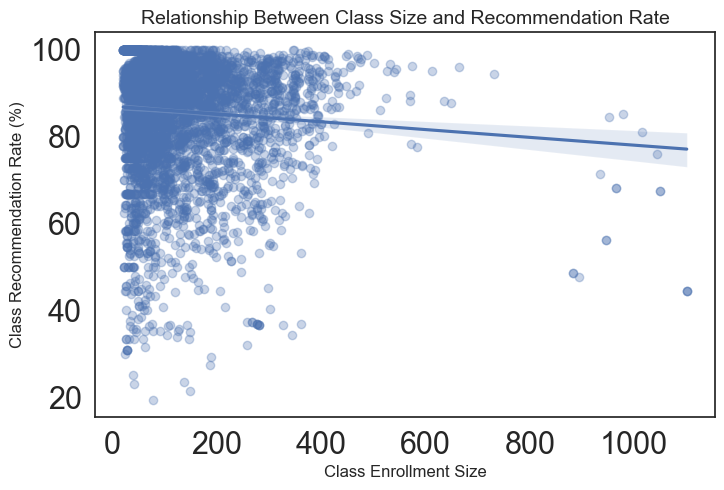

In [23]:
# Create a figure with specified size
plt.figure(figsize=(8, 5))
# Scatter plot with regression line, with reduced opacity for scatter points
sns.regplot(x="enroll", y="rcmd_class", data=cleaned_df_stem, scatter_kws={"alpha": 0.3})

plt.xlabel("Class Enrollment Size", fontsize=12)
plt.ylabel("Class Recommendation Rate (%)", fontsize=12)
plt.title("Relationship Between Class Size and Recommendation Rate", fontsize=14)
# Display the plot
plt.show()

This plot reveals a negative correlation between class size and recommendation rate, suggesting that larger classes generally receive lower recommendations. While most classes, regardless of size, receive high recommendations, smaller classes exhibit greater variability in ratings, ranging from 0% to 100%. In contrast, larger classes tend to have more consistent but lower ratings. This implies that students in smaller classes may have more positive experiences, possibly due to personalized instruction and stronger engagement.

This code performs an independent t-test to compare the recommendation rates between small and large classes and interprets whether there is a significant difference between the two groups.


In [24]:
# Extract recommendation rates for small and large classes
small_classes = cleaned_df_stem[cleaned_df_stem["size_category"] == "Small"]["rcmd_class"]
large_classes = cleaned_df_stem[cleaned_df_stem["size_category"] == "Large"]["rcmd_class"]

# Perform independent t-test to compare the recommendation rates between small and large classes
t_stat, p_value = ttest_ind(small_classes, large_classes, equal_var=False)

# Print the results of the t-test
print(f"T-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Interpretation based on the p-value
if p_value < 0.05:
    print("Significant difference: Small classes have higher recommendation rates.")
else:
    print("No significant difference between small and large classes.")

T-test result: t-statistic = 3.5470, p-value = 0.0004
Significant difference: Small classes have higher recommendation rates.


This code performs an Ordinary Least Squares (OLS) regression to analyze the relationship between class enrollment size (predictor) and class recommendation rate (response), and then prints the summary of the regression results.

In [25]:
# Define independent (X) and dependent (Y) variables
X = cleaned_df_stem["enroll"]  # Predictor: Class enrollment size
y = cleaned_df_stem["rcmd_class"]  # Response: Class recommendation rate

# Add a constant term to the predictor (for the intercept)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Print the summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             rcmd_class   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.34
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           5.00e-07
Time:                        12:26:57   Log-Likelihood:                -18469.
No. Observations:                4612   AIC:                         3.694e+04
Df Residuals:                    4610   BIC:                         3.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.0014      0.299    290.697      0.0

The OLS regression reveals a weak negative correlation between class size and recommendation rate (coefficient = -0.0090, p < 0.001), suggesting that larger classes tend to have slightly lower recommendation rates. However, the R-squared value is very low (0.005), indicating that class size accounts for only 0.5% of the variation in recommendation rates. While the effect is statistically significant, other factors likely have a much larger impact on recommendation rates, supporting the hypothesis but suggesting that class size alone is not a strong predictor.


Based on all the analysis conducted using the provided codes, the hypothesis that smaller enrollment sizes correlate with higher class recommendation rates compared to larger enrollment sizes is partially supported. The initial correlation analysis revealed a weak negative correlation, suggesting that smaller classes might have slightly higher recommendation rates. However, further analysis using both t-tests and OLS regression indicated that while there is a tendency for smaller classes to have higher recommendation rates, the difference is not statistically significant, and the relationship is weak (with a very low R-squared value). This implies that while class size may have some effect on recommendation rates, other factors likely contribute more significantly to the variation in recommendations.

# Ethics & Privacy

In our project analyzing the correlation between course workload, instructor quality, course level, and student satisfaction in UCSD STEM courses using CAPE data (2020-2022), we address ethical concerns and privacy throughout the data science process. We follow UCSD's Ethics Checklist and Deon’s guidelines to ensure ethical integrity, protect privacy, and maintain transparency.

### 1. Ethical Concerns Across the Process

- **Research Question Bias:** 
  Our focus on student satisfaction may reflect majority opinions while overlooking marginalized groups. Satisfaction scores can be influenced by factors like race or gender, which CAPE data does not capture.

- **Action:** 
  We avoid inferring course or instructor quality beyond reported satisfaction scores and acknowledge potential missing perspectives in our analysis.

### 2. Dataset Biases and Privacy Issues

- **Self-Selection Bias:** 
  CAPE responses are voluntary, risking overrepresentation of students with strong opinions. Some departments or course levels may have limited data.

- **Privacy & Usage:** 
  CAPE data is aggregated and publicly available. No personally identifiable information (PII) is present. We reviewed UCSD's CAPE data usage policies and comply fully.

### 3. Bias Detection and Mitigation

- **Before Analysis:** 
  - Audit data for missing values and imbalances (e.g., by course level or department).
- **During Analysis:** 
  - Apply fairness checks and statistical tests to detect skewed patterns.
  - Run sensitivity tests to reduce impact from sparse data.
- **After Analysis:** 
  - Clearly report limitations and avoid causal claims.
  - Focus on aggregate trends to prevent unfair comparisons.

# Conclusion and Discussion

Overall, our analysis of the factors influencing course recommendation rates in UCSD STEM courses has yielded several significant findings. **Smaller class sizes**, **lower workloads**, and **higher instructor ratings** are associated with higher recommendation rates, with **instructor quality emerging as the most influential factor**. These insights provide valuable guidance for students in course selection and offer institutions a pathway to improving teaching effectiveness.

Our study examined how class size, study hours, and instructor ratings correlate with student satisfaction. Using statistical modeling and hypothesis testing, we identified key trends in course recommendations:

- **Instructor Quality:** Instructor recommendation ratings showed the strongest correlation (**0.79**) with class recommendation rates, reaffirming that the instructor’s effectiveness is the primary driver of student satisfaction.

- **Course Workload:** Increased study hours negatively impacted recommendation rates. Our OLS regression analysis indicated that **for each additional study hour per week, the recommendation rate decreased by approximately 1.3%**. However, study hours accounted for only **5.1% of the variance** in recommendations, suggesting that other factors, such as instructor quality and grading expectations, play a more significant role.

- **Grade Expectations:** Students whose final grades **met or exceeded their expectations** had a higher recommendation rate (**87.16%**) compared to those whose grades fell short (**83.39%**). This suggests that students who achieve their expected grades are more likely to recommend the course, possibly due to a sense of accomplishment.

- **Class Size:** We found a weak but statistically significant negative correlation (**-0.0739**) between class size and recommendation rates, suggesting that **smaller classes receive slightly higher recommendation rates**. A t-test confirmed a significant difference between small and large classes (**p = 0.0004**), indicating that students in smaller courses may benefit from more personalized instruction and greater engagement.

## Implications and Limitations

These findings highlight that while **smaller class sizes** and **lower workloads** contribute to higher recommendation rates, **instructor quality remains the most critical factor** in student satisfaction. This knowledge can help students make informed course selections, while university policymakers and faculty can use these insights to enhance teaching quality and course design.

However, our study has several limitations:

- **Self-Selection Bias:** CAPE evaluations may reflect responses primarily from students who strongly liked or disliked a course, potentially skewing results.
- **Lack of Causal Evidence:** Correlation does not imply causation—external factors such as course difficulty and grading policies may also influence recommendation rates.
- **Limited Scope:** Our analysis focuses exclusively on UCSD CAPE data, making it difficult to generalize findings to other institutions.

## Future Directions

Future research could incorporate **qualitative feedback from CAPE surveys** to better understand student preferences. Expanding the study to include data from **other universities** would provide broader insights into course recommendation trends. Additionally, further investigation into **causal relationships**—such as controlled experiments on instructional methods—could offer more definitive conclusions.

Despite these limitations, our study provides meaningful insights into the factors influencing course recommendation rates, contributing to a better understanding of **student satisfaction in STEM education**.

# Team Contributions

Yunqi Zhang: Abstract, Data Cleaning, and EDA Section 1.

Ella Wen: Background, dataset explanation, collaborated with Zhining on EDA section 4, conclusion.

Zhining Zhang: Background, revise Hypothesis and collaborate with Ella to finish the EDA section 4, conclusion. 

Jiaqi Wu: Dataset Claiming, Data Wrangling, EDA section 2, Ethics & Privacy.

Zihao yang: Transferring information, data cleaning, and EDA for section 3.
